# Section 1: Introduction

In an effort to reduce air pollution, traffic congestion, and traffic accidents, public bike-sharing programs have extended to major cities throughout the world. Bicycles can be picked up and dropped off at any station, resulting in inventory imbalances. System operators should develop appropriate repositioning methods based on accurate demand projections for bicycles to increase system efficiency. Using New York's station activity data, this study seeks to anticipate station-level demand, and for demand of bicycle pickup per hour. 

Ruiqi Zhu were in charge of the prediction challenge (section 2.1 and appendix 2), Diana Podoroghin made the data visualisation and exploratory part 1 (section 3.1) and Miriam Khader contributed with analysing the station demand in exploratory part 2 (section 3.2). 

# Data analysis and visualization 

First of all we have to import all the packages that we are aiming to use.

In [1]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import sys
import seaborn as sns

Now we are loading our dataset.

In [2]:
# load data
df = pd.read_csv("Trips_2018.csv")
df.head()

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


Here we do the standart conversion of our "starttime" and "stoptime" to time format

In [21]:

df['starttime']=pd.to_datetime(df['starttime'], format="%Y-%m-%d %H:%M:%S.%f")
df['stoptime']=pd.to_datetime(df['stoptime'], format="%Y-%m-%d %H:%M:%S.%f")


In [6]:
df.shape #here we get an inside of how many variables and observations we have 

(17548339, 14)

In [5]:
df['start_station_id'].unique().shape # here we can see how many unique station we have  

(819,)

To gain a better understanding of the data, we'll start by looking at trip numbers and trip lengths. Plotting the number of trips each day over the entire year of 2018 is one method to look at trip counts.


C:\Users\diana\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  import sys


Text(0, 0.5, 'Number of trips')

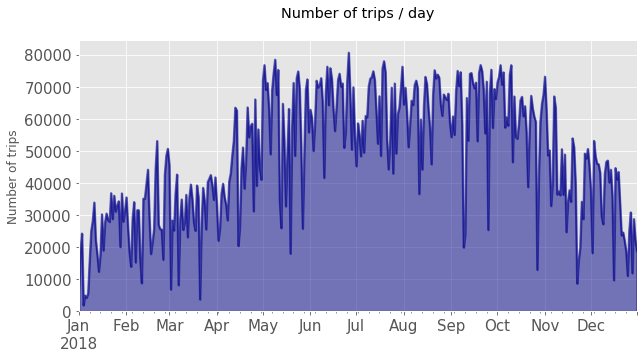

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# We calculate trip counts per day
df.index = df['starttime'] #  here we Set'starttime' variable as the index
countsPerDay = df.starttime.resample('D', how = ['count'])
countsPerDay.plot(kind = 'area', stacked = False, figsize = (10, 5),color = 'darkblue', linewidth = 2, legend = False)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.title('Number of trips / day\n')
plt.xlabel('')
plt.ylabel('Number of trips')

The graph illustrates a general tendency of raising the number of travels from the winter to the summer, then reducing as the weather gets harsher. Regular dramatic drops in daily travel numbers, corresponding to weekends or holidays, can also be noted.

We plotted a histogram of the tripduration variable to evaluate trip durations. The histogram demonstrates that most excursions are short, with the majority lasting less than 10 minutes. Longer sessions over 30 minutes are uncommon. As a result, all journeys lasting more than an hour were eliminated, as they were unusual outliers.

Text(0, 0.5, 'Trip counts')

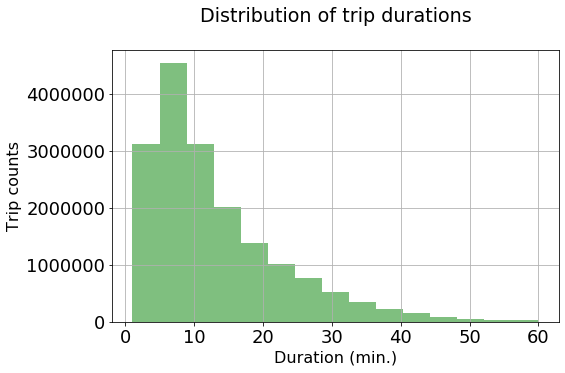

In [7]:

# Collect all trips shorter than 1 hour
duration = df.loc[(df.tripduration / 60 < 60)][['tripduration']]
duration = duration / 60 # In minutes

# Plot the distribution of trip durations
plt.rcParams.update({'font.size': 16})
duration.hist(figsize = (8,5), bins = 15, alpha = 0.5, color = 'green')
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.title('Distribution of trip durations\n')
plt.xlabel('Duration (min.)')
plt.ylabel('Trip counts')

In [22]:
# We get a subset of weekdays by indexing by 'datetime64' data in the'starttime' variable.
df.index = df['starttime']
weekdays = df[df.index.weekday < 5]

In [23]:
#  next we compute the value of the trip counts per hour on weekends and weekdays.
dt = df.loc[:, ['tripduration', 'starttime']] # Only these variables are kept here'starttime' and 'tripduration'
dt.index = dt['starttime']
weekdays = dt[dt.index.weekday < 5]
weekends = dt[dt.index.weekday > 4]
weekdays_PerHr = weekdays.groupby(weekdays.index.hour).size()
weekends_PerHr = weekends.groupby(weekends.index.hour).size()

Text(0, 0.5, 'Number of trips')

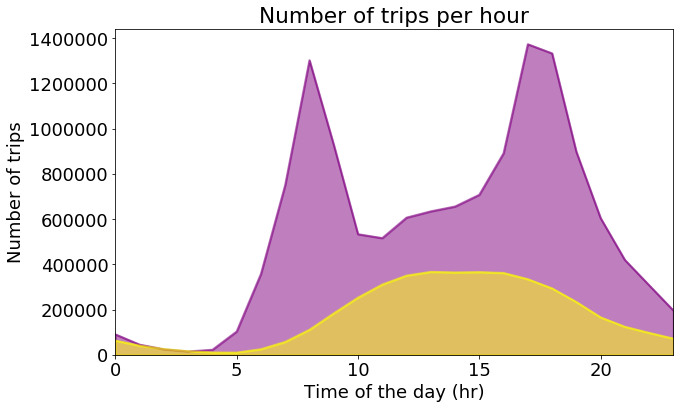

In [25]:
plt.rcParams.update({'font.size': 18, 'legend.fontsize': 20})
weekdays_PerHr.plot(kind = 'area', stacked = False, figsize = (10, 6), color = 'purple',
                          linewidth = 2, label='Weekdays')

weekends_PerHr.plot(kind = 'area', stacked = False, color = 'yellow',
                          linewidth = 2, label='Weekends')

plt.tick_params(axis = 'both', which = 'major', labelsize = 18)

plt.title('Number of trips per hour')
plt.xlabel('Time of the day (hr)')
plt.ylabel('Number of trips')


On weekdays, there are two distinct commuting peaks, as shown in the graph. Weekend usage differs from weekdays, as one would expect, with fewer trips per hour. It would be fascinating to see how station usage changes over the course of a typical weekday.

We also can take a look on the gendar distribution of the users.

In [ ]:
genders = ['Unknown', 'Male', 'Female']
y = [0, 1, 2]
trip_counts = df.groupby('gender')['gender'].count()
# Plot
plt.rcParams.update({'font.size': 10})
plt.barh(y, trip_counts / 1000000, align = 'center', alpha = 0.4, color = 'black')
plt.yticks(y, genders)
plt.xlabel('Millions of trips')
plt.title('Distribution of trips by gender')
plt.show()

# Appedix

We also can see the number of trips per specific day.

In [3]:
df = df.astype({"starttime": "datetime64"})
df = df.astype({"stoptime": "datetime64"})

In [4]:
#Using starttime,  we make new columns for the day of the week and the hour.
df["start_day"] = df["starttime"].dt.weekday_name
df["start_hour"] = df["starttime"].dt.hour
df.head()

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,start_day,start_hour
0,0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1,Monday,13
1,1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1,Monday,15
2,2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1,Monday,15
3,3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1,Monday,15
4,4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1,Monday,18


In [5]:
# In order to visualize the start hour for every day of the week we need to find the mean of the trips that start by day/hour
trips = df.groupby(["start_hour","start_day"]).count()
trips.head()

Unnamed: 0  tripduration  starttime  stoptime  \
start_hour start_day                                                  
0          Friday          23013         23013      23013     23013   
           Monday          15200         15200      15200     15200   
           Saturday        31927         31927      31927     31927   
           Sunday          31049         31049      31049     31049   
           Thursday        19228         19228      19228     19228   

                      start_station_id  start_station_latitude  \
start_hour start_day                                             
0          Friday                22999                   23013   
           Monday                15184                   15200   
           Saturday              31913                   31927   
           Sunday                31034                   31049   
           Thursday              19216                   19228   

                      start_station_longitude  end_station_id  \
start_hour start_day                                            
0          Friday                       23013           22999   
           Monday                       15200           15184   
           Saturday                     31927           31913   
           Sunday                       31049           31034   
           Thursday                     19228           19216   

                      end_station_latitude  end_station_longitude  bikeid  \
start_hour start_day                                                        
0          Friday                    23013                  23013   23013   
           Monday                    15200                  15200   15200   
           Saturday                  31927                  31927   31927   
           Sunday                    31049                  31049   31049   
           Thursday                  19228                  19228   19228   

                      usertype  birth_year  gender  
start_hour start_day                                
0          Friday        23013       23013   23013  
           Monday        15200       15200   15200  
           Saturday      31927       31927   31927  
           Sunday        31049       31049   31049  
           Thursday      19228       19228   19228

In [6]:
trips= trips['tripduration'].unstack()

In [7]:
# To find the avarge of the trips per week we need to divide the toatal by 108
trips = trips/108

In [8]:
trips

start_day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
start_hour,,,,,,,
0,213.083333,140.740741,295.620370,287.490741,178.037037,141.703704,164.888889
1,110.981481,74.500000,190.842593,186.722222,83.398148,69.416667,79.074074
2,58.620370,44.268519,117.574074,120.722222,43.009259,37.342593,42.768519
3,34.500000,28.037037,70.935185,78.287037,27.009259,24.092593,25.361111
4,41.222222,40.259259,49.083333,47.833333,40.907407,42.537037,41.518519
5,169.648148,179.194444,52.638889,39.453704,188.000000,213.416667,206.064815
6,588.509259,607.944444,138.046296,93.009259,677.212963,742.611111,697.416667
7,1250.481481,1281.759259,313.750000,216.074074,1430.592593,1527.953704,1458.703704
8,2216.444444,2155.805556,590.444444,436.268519,2544.592593,2595.796296,2540.962963


Text(0, 0.5, 'The amount of trips')

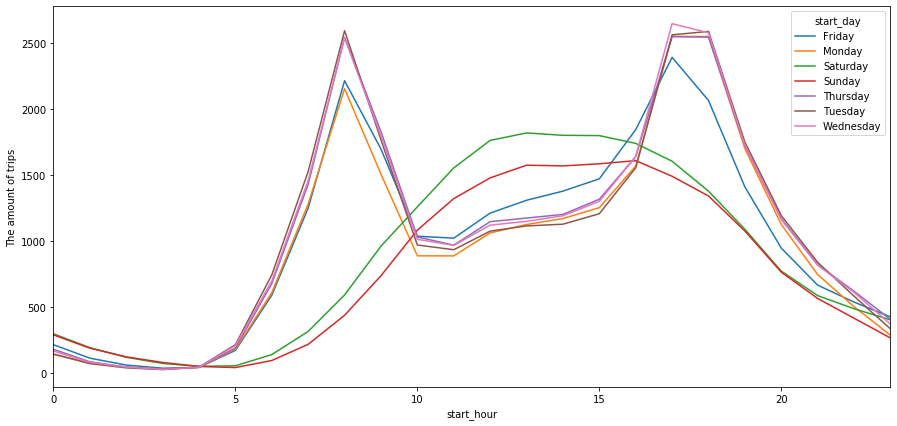

In [9]:
# To examine the number of trips per hour as a function of the days,we have plot the data.
fig, ax = plt.subplots(figsize=(15,7))
trips.plot(ax=ax)
plt.ylabel('The amount of trips')

Refernces:
https://www.researchgate.net/publication/343168746_Predicting_Demand_for_a_Bike-Sharing_System_with_Station_Activity_Based_on_Random_Forest
http://luisvalesilva.com/datasimple/citibike.html
https://arxiv.org/ftp/arxiv/papers/1712/1712.04997.pdf  
https://www.igi-global.com/gateway/article/full-text-html/288513&riu=true

Author:Diana Podoroghin-s194768